## Inference

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torch
from unet.models import UNet
from tools.inference import preprocess, resize

In [2]:
image_size = 512
model_weight = "./weights/model.pt"
input_path = "./assets/image.jpg"

# Load weight
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
checkpoint = torch.load(model_weight, map_location=device)

# Initialize model and load checkpoint
model = UNet(in_channels=3, out_channels=2)
model.load_state_dict(checkpoint["model"].float().state_dict())

<All keys matched successfully>

In [3]:
input_image = Image.open(input_path)
model.eval()
model.to(device)
# preprocess
resized_image = resize(input_image)
tensor_image = torch.from_numpy(preprocess(resized_image, is_mask=False))
tensor_image = tensor_image.unsqueeze(0)
tensor_image = tensor_image.to(device, dtype=torch.float32)

# inference
with torch.no_grad():
    output = model(tensor_image).cpu()
    output = output.argmax(dim=1)

mask = output[0].long().squeeze().numpy()

In [4]:
# postprocessing
result = Image.fromarray((mask * 255).astype(np.uint8))

(-0.5, 511.5, 511.5, -0.5)

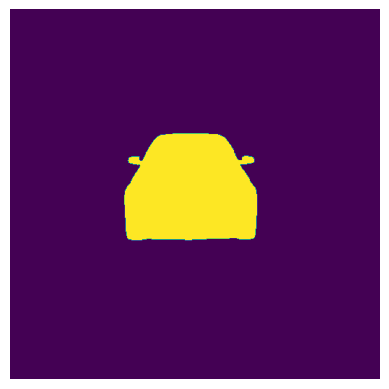

In [5]:
# show the prediction mask
plt.imshow(np.array(result))
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

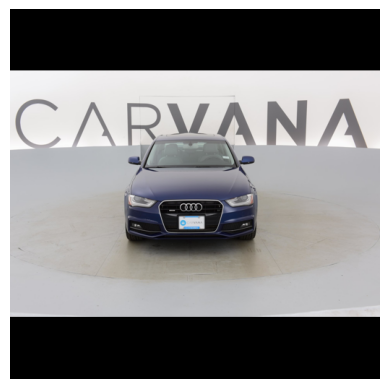

In [6]:
# show the input image
plt.imshow(np.array(resized_image))
plt.axis('off')